In [1]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Définir les transformations pour les images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionner à 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Charger le dataset Flowers102 avec les transformations définies
dataset = datasets.Flowers102(root='./data', split='train', transform=transform, download=True)

# Diviser le dataset en ensembles d'entraînement (80%) et de test (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Créer les DataLoader pour l'entraînement et le test
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [3]:
# Charger le modèle pré-entraîné ResNet18
model = models.resnet18(pretrained=True)

# Remplacer la couche fully connected pour correspondre au nombre de classes dans Flowers102
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 102)

# Définir l'optimiseur et la fonction de perte
optimiseur = optim.Adam(model.parameters(), lr=0.001)
critere = nn.CrossEntropyLoss()

/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Époque : 0, Perte : 3.683104863533607, Précision : 21.07843137254902
Époque : 5, Perte : 0.04462349851830648, Précision : 71.56862745098039
Époque : 10, Perte : 0.002810835502504443, Précision : 81.86274509803921
Époque : 15, Perte : 0.0018496964476071298, Précision : 79.90196078431373
Époque : 20, Perte : 0.001067942594930243, Précision : 81.37254901960785
Nombre d'images dans le dataset original: 1020
Nombre d'images dans le train_loader: 816
Nombre d'images dans le test_loader: 204


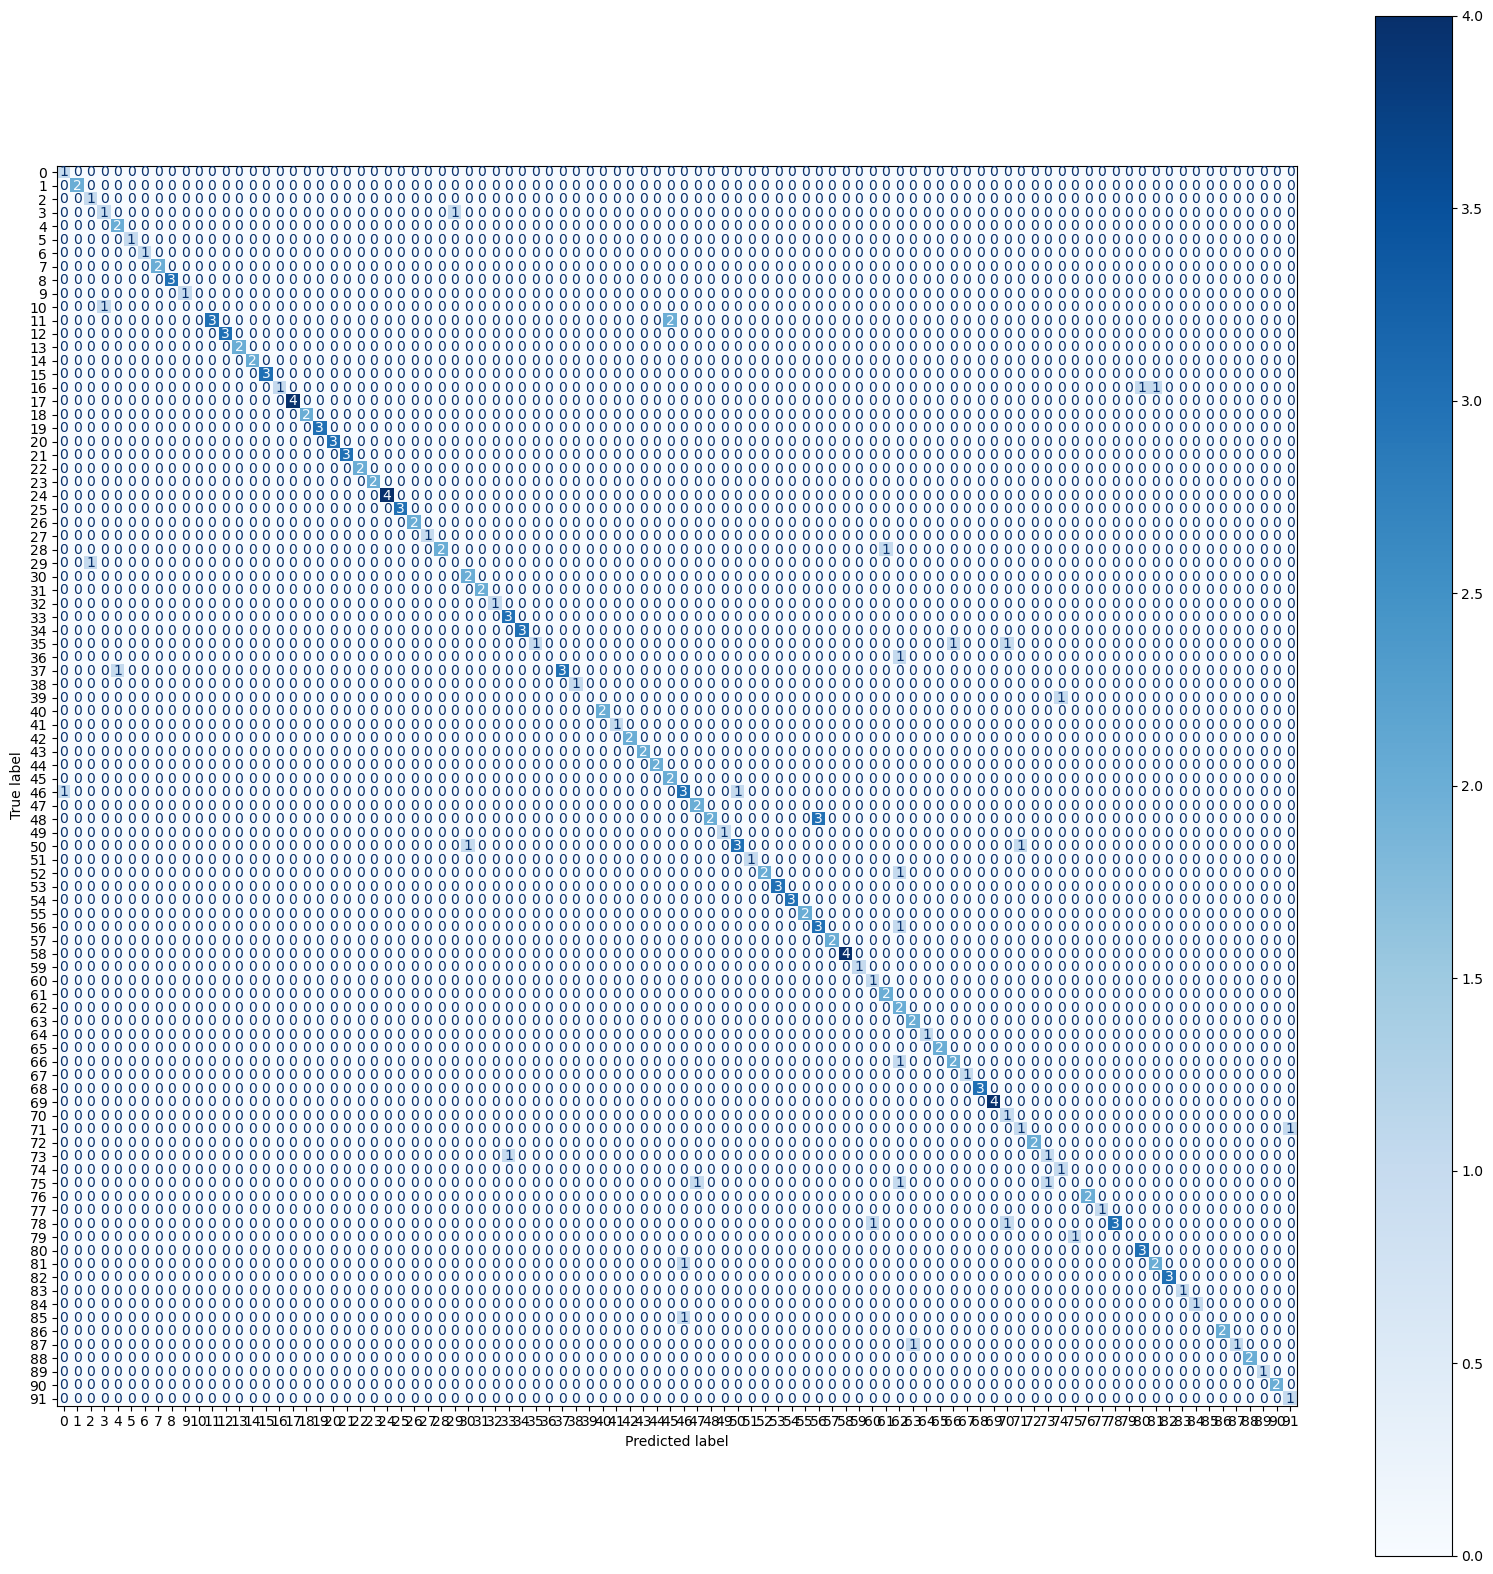

In [4]:
# Boucle d'entraînement et d'évaluation
epochs = 25
train_losses = []
accuracies = []
saved_images = []
saved_labels = []
saved_labels_predict = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        optimiseur.zero_grad()
        outputs = model(images)
        loss = critere(outputs, labels)
        loss.backward()
        optimiseur.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))
    
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    model.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            saved_images.append(images)
            saved_labels.append(labels)
            saved_labels_predict.append(predicted)
    
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    
    if epoch % 5 == 0:
        print(f'Époque : {epoch}, Perte : {running_loss / len(train_loader)}, Précision : {accuracy}')

print(f'Nombre d\'images dans le dataset original: {len(dataset)}')
print(f'Nombre d\'images dans le train_loader: {len(train_loader.dataset)}')
print(f'Nombre d\'images dans le test_loader: {len(test_loader.dataset)}')

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(all_labels, all_predictions)
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the figsize as needed
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [9]:
## Pourcentage d'étiquette bien prédite
exact = 0
taille = len(all_labels)
for i in all_labels :
    if all_labels[i] == all_predictions[i] :
        exact +=1
    pourcentage_exactitude = (exact/taille)*100
print(f'Taille de l\'échantillon : {taille}')
print(f'Nombre de valeurs bien prédites : {exact}')
print(f'% de valeurs bien prédites : {pourcentage_exactitude}')

Taille de l'échantillon : 204
Nombre de valeurs bien prédites : 169
% de valeurs bien prédites : 82.84313725490196


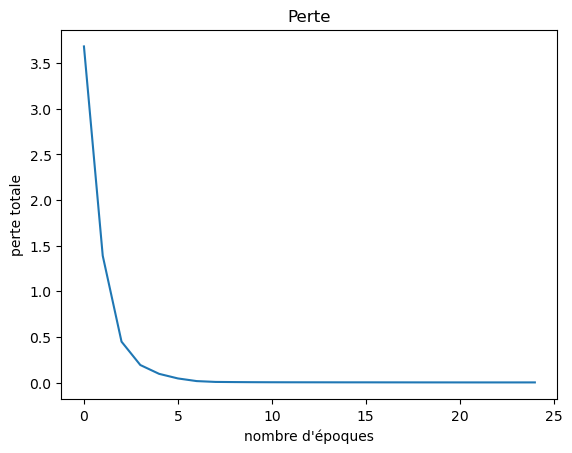

In [10]:
plt.plot(train_losses)
plt.xlabel("nombre d'époques")
plt.ylabel("perte totale")
plt.title("Perte")
plt.show()

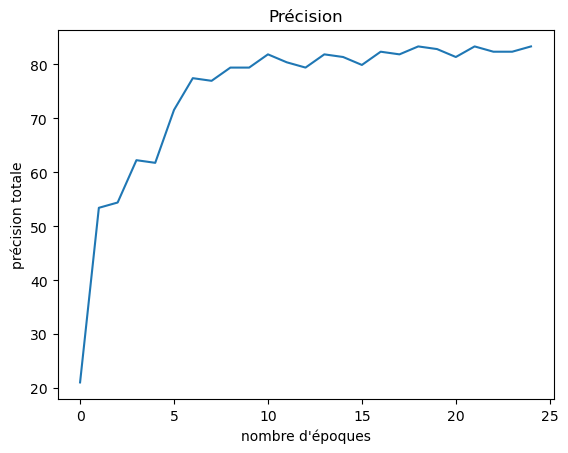

In [11]:
plt.plot(accuracies)
plt.xlabel("nombre d'époques")
plt.ylabel("précision totale")
plt.title("Précision")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

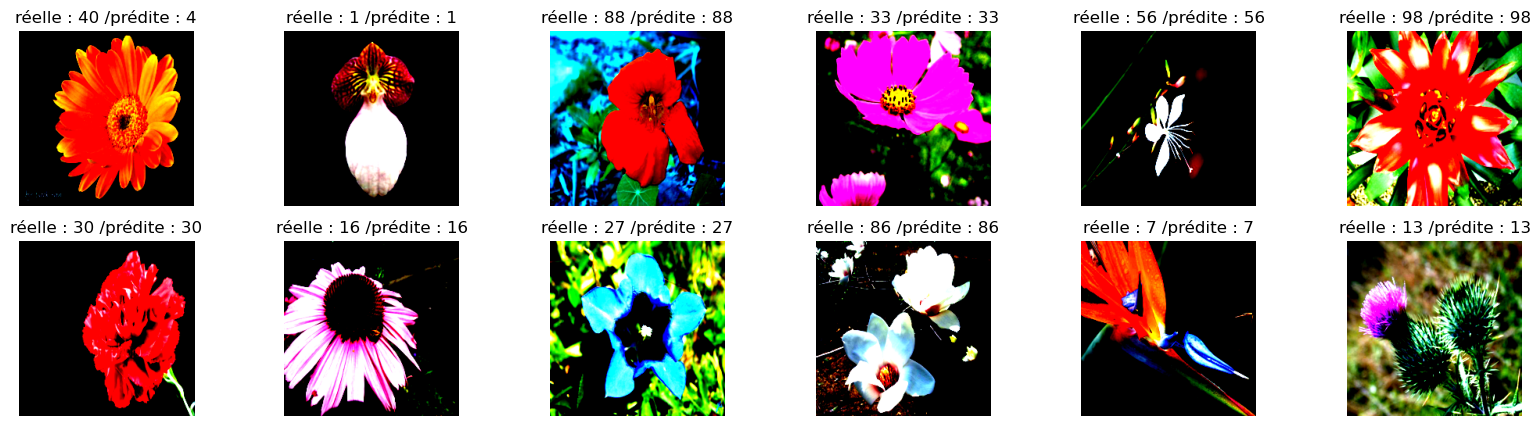

In [5]:
last_epoch_images = saved_images[-1]
last_epoch_labels = saved_labels[-1]
last_epoch_labels_predict = saved_labels_predict[-1]
num_images_to_show = 12

# Afficher les images et leurs étiquettes
plt.figure(figsize=(20, 5))
for i in range(num_images_to_show):
    ax = plt.subplot(2, num_images_to_show// 2, i + 1)
    image = last_epoch_images[i].permute(1, 2, 0)  # Reformatage pour matplotlib
    ax.imshow(image)
    ax.set_title(f'réelle : {last_epoch_labels[i].item()} /prédite : {last_epoch_labels_predict[i].item()}')
    ax.axis('off')
plt.show()